In [42]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

import cufflinks as cf
import plotly as py
import plotly.offline
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [44]:
data = pd.read_csv('CDNOW_master.txt', delim_whitespace=True, names=['id', 'date', 'quantity', 'cost'])
# Sort dataframe by date
# data = data.drop(data[data.cost == 0].index)
data = data.sort_values(['date'])
# Add year/month columns for later
data['year'] = [str(x)[:4] for x in data['date']]
data['month'] = [str(x)[4:6] for x in data['date']]
data['day'] = [str(x)[6:8] for x in data['date']]
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
# Number of days between purchase date and last purchase date i.e 30.06.1998
data['day_to_last_date'] = (data['date'].max() - data['date']).dt.days


In [3]:
# Small preview
print('Small preview')
display(data.head(), data.tail())
display(data.describe())
print(data.id.nunique())


Small preview


,id,date,quantity,cost,year,month,day,day_to_last_date
0,1,1997-01-01,1,11.77,1997,01,01,545
802,216,1997-01-01,1,13.97,1997,01,01,545
337,89,1997-01-01,3,47.08,1997,01,01,545
803,217,1997-01-01,2,57.54,1997,01,01,545
808,219,1997-01-01,3,38.51,1997,01,01,545


,id,date,quantity,cost,year,month,day,day_to_last_date
35093,11515,1998-06-30,4,47.46,1998,06,30,0
56656,18912,1998-06-30,3,40.36,1998,06,30,0
26992,8631,1998-06-30,2,29.91,1998,06,30,0
8972,2844,1998-06-30,2,33.48,1998,06,30,0
53628,17786,1998-06-30,2,27.98,1998,06,30,0


,id,quantity,cost,day_to_last_date
count,69659.000000,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648,362.057738
std,6819.904848,2.333924,36.281942,159.511302
min,1.000000,1.000000,0.000000,0.000000
25%,5506.000000,1.000000,14.490000,235.000000
50%,11410.000000,2.000000,25.980000,432.000000
75%,17273.000000,3.000000,43.700000,493.000000
max,23570.000000,99.000000,1286.010000,545.000000


23570


In [4]:
total = data['quantity'].sum()
print('A total of : ',total, 'CDs were sold from 1997-01 to 1998-06')
# Sample has been collected on a period of 18 months from 1997-01 to 1998-06
# Average number CD's sold each month
avr_month = total / 18
print('On average', np.ceil(avr_month), 'CDs were sold each month')
# Average number CD's sold each day
total_work_days = data['date'].nunique()
avr_day = total / total_work_days
print('On average', np.ceil(avr_day), 'CDs were sold each day')
total_profit = data['cost'].sum()
print('Total revenue', total_profit)
# About 2.5 million

A total of :  167881 CDs were sold from 1997-01 to 1998-06
On average 9327.0 CDs were sold each month
On average 308.0 CDs were sold each day
Total revenue 2500315.6300000004


<h1><font color=red >Analysis by year/month/day</font></h1>

In [5]:
# Let's group the dataframe by year
group_year = data.groupby('year')

month
01    627.0
02    891.0
03    844.0
04    325.0
05    235.0
06    244.0
07    263.0
08    189.0
09    191.0
10    201.0
11    261.0
12    208.0
dtype: float64

count     12.000000
mean     372.672421
std      259.537888
min      188.741935
25%      205.298387
50%      251.883333
75%      399.805645
max      890.035714
dtype: float64

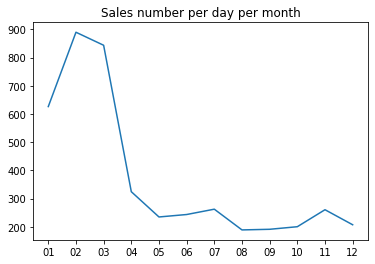

In [6]:
# First year first !
year_1 = group_year.get_group('1997')
# Group by months
group_months_y1 = year_1.groupby('month')
# Get the number of working days per month
wdays_per_month_y1 = group_months_y1['date'].nunique()
# average number CDs sold each day each month
avr_per_month_y1 = group_months_y1['quantity'].sum() / wdays_per_month_y1
display(np.ceil(avr_per_month_y1))
display(avr_per_month_y1.describe())
# Now let's plot it
plt.title('Sales number per day per month')
plt.plot(avr_per_month_y1)
# From that we can see that most CDs are sold during the first trimester of 1997

<h2><font color=yellow>USERS PER MONTH</font></h2>

month
01    7846
02    9633
03    9524
04    2822
05    2214
06    2339
07    2180
08    1772
09    1739
10    1839
11    2028
12    1864
Name: id, dtype: int64


Text(0.5, 1.0, 'Client number per month')

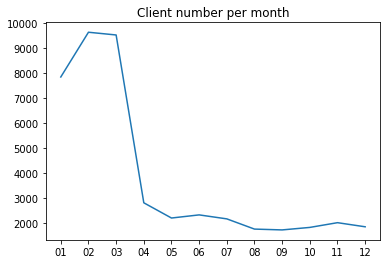

In [7]:
# Evolution of the number of consumers each month
# Number of different consumer having made atleast one purchase each month
user_per_month_y1 = group_months_y1['id'].nunique()
print(user_per_month_y1)
a = plt.plot(user_per_month_y1)
plt.title('Client number per month')
# We can see that sales and consumers numbers are strongly correlated


<h1><font color=red >Analysis by year/month/day 2</font></h1>

month
01    171.0
02    191.0
03    240.0
04    157.0
05    159.0
06    177.0
dtype: float64

count      6.000000
mean     181.940553
std       30.959943
min      156.566667
25%      161.185484
50%      173.245699
75%      187.094048
max      239.709677
dtype: float64

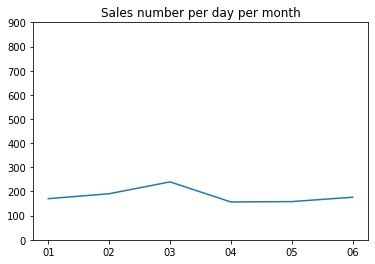

In [45]:
year_2 = group_year.get_group('1998')
# Group by months
group_months_y2 = year_2.groupby('month')
# Get the number of working days per month
wdays_per_month_y2 = group_months_y2['date'].nunique()
# average number CDs sold each month
avr_per_month_y2 = group_months_y2['quantity'].sum() / wdays_per_month_y2
display(np.ceil(avr_per_month_y2))
display(avr_per_month_y2.describe())
plt.title('Sales number per day per month')
plt.ylim((0,900))
plt.plot(avr_per_month_y2)
# Sales have decreased considerably for the first trimester, but are more homogeneous.
# When compared to overall CD sales by year, this decrease seems coherent.

month
01    1537
02    1551
03    2060
04    1437
05    1488
06    1506
Name: id, dtype: int64


Text(0.5, 1.0, 'Client number per month')

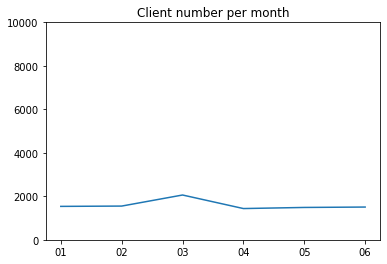

In [48]:
# Evolution of the number of consumers each month
# Number of different consumers having made atleast one purchase each month
user_per_month_y2 = group_months_y2['id'].nunique()
print(user_per_month_y2)
plt.plot(user_per_month_y2)
plt.ylim((0,10000))
plt.title('Client number per month')
# We can see that sales and consumers numbers are stronly correlated


<h1><font color=red>ANALYSIS OF CLIENTS</font></h1>

In [10]:
group_client = data.groupby('id')

In [11]:
# CDs purchase by client
cd_purchase_per_client = group_client['quantity'].sum()

number_purchase_per_client = group_client['quantity'].count()

profit_made_per_client = group_client['cost'].sum()



# As expected clients buying more cd's also make more purchases

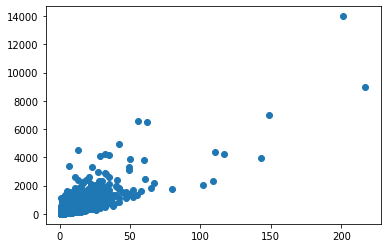

In [12]:
# Here I am trying to determine if profit is related to the number of sales
# i.e is profit generated by a great amount of light purchases or by scarce heavy pucharses ?
# Seems like it's the first option
plt.scatter(number_purchase_per_client, profit_made_per_client)

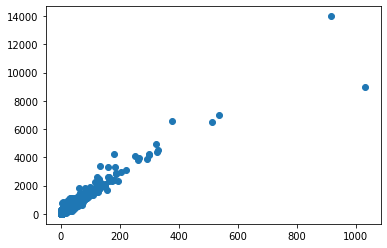

In [13]:
# We can see that the number of sold cds is proportional to the profit 
plt.scatter(cd_purchase_per_client, profit_made_per_client)

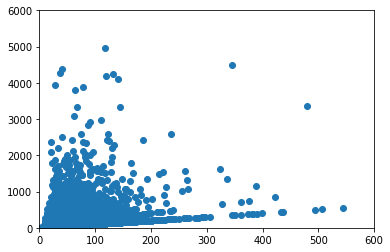

In [14]:
# We can se here too, that customers making a lot of small purchases bring more money on average.
avr_profit_per_transaction = profit_made_per_client / number_purchase_per_client


plt.xlim(0,  600)
plt.ylim(0, 6000)
plt.scatter(avr_profit_per_transaction, profit_made_per_client)


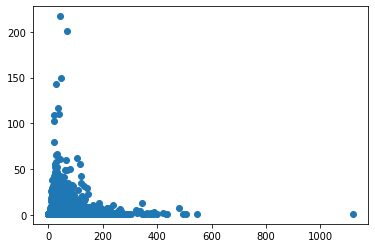

In [15]:
# This is the direct consequence of the previous plot
plt.scatter(avr_profit_per_transaction, number_purchase_per_client)

# We have seen that profit is correlated to the number of individual purchases. Let's try to segment consumers into different categories, depending on how much transactions they make,  we'll also create a column for the total profit generated by the consumer and the average profit per transaction.

In [16]:
# After looking at the histogram we classify the number of purchases in 5 classes
binned_number_purchases = pd.cut(number_purchase_per_client, [0, 5, 10, 15, 20, 25, 35, 40,
                                                              45, 50, 300],
                                 labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).rename('class')

avr_profit_per_transaction = avr_profit_per_transaction.rename("avr_profit")

# Now we need to get the mean profit per class and the mean profit per class
# First we concat all the needed Series togeter
concat_all = pd.concat([binned_number_purchases, avr_profit_per_transaction, 
                        profit_made_per_client], axis=1)
# We group by class
group_by_bin = concat_all.groupby('class')

# We get the mean
individual_per_class = group_by_bin['cost'].count().rename('customers')
mean_avr = group_by_bin['avr_profit'].mean().rename('avr_profit_per_transaction')
mean_cost = group_by_bin['cost'].mean().rename('avr_profit')
cohort_profit = (individual_per_class * mean_cost).rename('total_profit')
# We concat them all back together
class_set = pd.concat([mean_avr, mean_cost, individual_per_class, cohort_profit], axis=1)
print(class_set)

       avr_profit_per_transaction   avr_profit  customers  total_profit
class                                                                  
1                       31.795658    59.945672      20640    1237278.68
2                       37.422212   278.907657       1980     552237.16
3                       40.593092   512.559560        545     279344.96
4                       39.403138   692.344062        192     132930.06
5                       39.150370   889.178529        102      90696.21
6                       43.036984  1286.852576         66      84932.27
7                       29.697494  1130.423000         10      11304.23
8                       48.960303  2052.117500          8      16416.94
9                       44.216818  2146.776250          8      17174.21
10                      43.219330  4105.311053         19      78000.91


# Let's try to predict cost for one individual, form previous analysis we have seen that intersting variables are : number of purchase, profit per transaction, total revenue

In [84]:
# first 39 weeks
data_p1 = data.loc[data['date'] <= pd.datetime(1997, 10, 1)]
# last 39 weaks
data_p2 = data.loc[data['date'] > pd.datetime(1997, 10, 1)]
display(data_p1.head())
display(data_p2.head())

# group by id for p1
group_id_p1 = data_p1.groupby('id')
revenue = group_id_p1['cost'].sum().rename('revenue')
purchase = group_id_p1['quantity'].count().rename("purchase")
mean_revenue = group_id_p1['cost'].mean().rename("mean_revenue")
mean_cd = group_id_p1['quantity'].sum().rename("mean_cd")

# group by id for p2
group_id_p2 = data_p2.groupby('id')
p2_revenue = group_id_p2['cost'].sum()
print(p2_revenue.index)

train_set = pd.concat([revenue, purchase, mean_revenue, mean_cd], axis=1)

test_set = p2_revenue.reindex(train_set.index, fill_value=0)
display(test_set)


,id,date,quantity,cost,year,month,day,day_to_last_date
0,1,1997-01-01,1,11.77,1997,01,01,545
802,216,1997-01-01,1,13.97,1997,01,01,545
337,89,1997-01-01,3,47.08,1997,01,01,545
803,217,1997-01-01,2,57.54,1997,01,01,545
808,219,1997-01-01,3,38.51,1997,01,01,545


,id,date,quantity,cost,year,month,day,day_to_last_date
36525,11988,1997-10-02,1,11.49,1997,10,02,271
35625,11682,1997-10-02,2,24.48,1997,10,02,271
1674,499,1997-10-02,1,9.49,1997,10,02,271
58999,19710,1997-10-02,2,21.98,1997,10,02,271
31954,10344,1997-10-02,3,45.47,1997,10,02,271


Int64Index([    3,     4,     5,     7,     8,     9,    11,    24,    25,
               29,
            ...
            23537, 23540, 23544, 23554, 23555, 23556, 23558, 23561, 23563,
            23564],
           dtype='int64', name='id', length=7039)


id
1          0.00
2          0.00
3         95.40
4         26.48
5        124.40
6          0.00
7        235.93
8         91.87
9         41.98
10         0.00
11        12.99
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17         0.00
18         0.00
19         0.00
20         0.00
21         0.00
22         0.00
23         0.00
24        10.49
25        86.42
26         0.00
27         0.00
28         0.00
29        84.42
30         0.00
          ...  
23541      0.00
23542      0.00
23543      0.00
23544     39.48
23545      0.00
23546      0.00
23547      0.00
23548      0.00
23549      0.00
23550      0.00
23551      0.00
23552      0.00
23553      0.00
23554     24.60
23555    144.89
23556     57.96
23557      0.00
23558     48.22
23559      0.00
23560      0.00
23561     52.54
23562      0.00
23563     47.98
23564     46.47
23565      0.00
23566      0.00
23567      0.00
23568      0.00
23569      0.00
23570      0.00
Name: cost, Length: 2

In [18]:
display(train_set.head())

,revenue,purchase,mean_revenue,mean_cd
id,,,,
1,11.77,1,11.770000,1
2,89.00,2,44.500000,6
3,61.06,3,20.353333,6
4,74.02,3,24.673333,5
5,261.21,8,32.651250,19


In [19]:
train_set.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")
# We can see that mean_cd is strongly correlated to other columns, 
# which means we won't be able to extract much information from it
# So we remove it to prevent overfitting

In [20]:
train_set = train_set.drop(['mean_cd'], axis=1)

display(train_set.head())

,revenue,purchase,mean_revenue
id,,,
1,11.77,1,11.770000
2,89.00,2,44.500000
3,61.06,3,20.353333
4,74.02,3,24.673333
5,261.21,8,32.651250


In [21]:
train_set.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")

In [63]:
# It may also be interesting to get the time elapsed from last purchase
elapsed = (data_p1['date'].max() - group_id_p1['date'].min()).dt.days
# and the standart deviation of purchases
purchase_std = group_id_p1['day_to_last_date'].std().fillna(0)
# display(purchase_std)
train_set['elapsed'] = elapsed
train_set['purchase_std'] = purchase_std

train_set = train_set.drop('elapsed', axis=1)
train_set.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")


1.0
1.0
1.0
1.0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


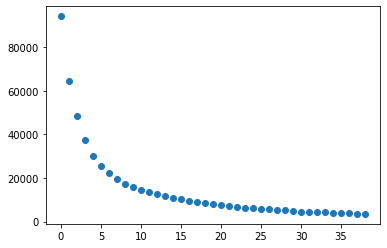

In [88]:
# Create a numpy array containing our dateset with normalized features
train = np.array(StandardScaler().fit_transform(train_set))
# Let's try to separate data into clusters using kmeans

# whitened = whiten(train)
x = range(0, 39)
y = []
for i in range(1,40):
    print(i)
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(train)
    y.append(Kmean.inertia_)

plt.scatter(x,y)

range(0, 39) [94280.0, 64459.47041616491, 48459.295256168785, 37379.923617649154, 30170.477324488238, 25458.435280444453, 22101.889105975926, 19473.07708131839, 17364.153124322285, 16023.313405731817, 14701.035651831324, 13479.309784686255, 12714.142650278893, 11739.001891439586, 10926.76033994708, 10150.580951611324, 9460.71588076423, 9044.464136296769, 8536.501341641624, 8114.325652004347, 7770.3079074110665, 7091.7387760581005, 6746.685623374241, 6452.927646191436, 6150.749912465067, 5836.172888299294, 5570.103392389513, 5280.055465160459, 5123.94336261668, 4819.5372751376335, 4611.896512711456, 4535.18175750966, 4326.84242550851, 4213.163261736166, 3981.243226596288, 3910.4313636044885, 3735.202911434281, 3635.1242914321465, 3523.4053046204504]
[15  0 31 ...  0  2  0]


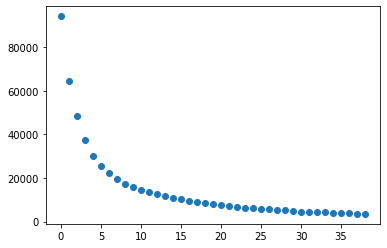

In [94]:
x = range(0,39)
print(x,y)
plt.scatter(x,y)
print(Kmean.labels_)

In [139]:
layout = go.Layout(title='Plot Title',
    xaxis=dict(
        title='Revenue',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Purchase',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data = [go.Scatter3d(x=train[:, 0], y=train[:, 1], z=train[:, 2], 
                                     mode='markers')])

fig.show()




[-0.42330355 -0.4266431  -0.69143349 -0.39507615]


# Clustering does not seem to bear fruits..
Let's try regression